In [1]:
import numpy as np  # Importing NumPy library
import pandas as pd  # Importing Pandas library
import matplotlib.pyplot as plt  # Importing Matplotlib library's "pyplot" module
import seaborn as sns  # Imorting Seaborn library
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import os

df= pd.read_csv("Volumetric_features.csv")


In [2]:
# Checking for missing values
df.isna().sum()

S.No                            0
Left-Lateral-Ventricle          0
Left-Inf-Lat-Vent               0
Left-Cerebellum-White-Matter    0
Left-Cerebellum-Cortex          0
                               ..
rh_MeanThickness_thickness      0
BrainSegVolNotVent.2            0
eTIV.1                          0
Age                             0
dataset                         0
Length: 141, dtype: int64

In [3]:
x=df.iloc[:, df.columns != 'Age']
y=df.iloc[:, 139]

X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=42)

In [4]:
for i in range(9,10):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)

    knn_score= knn.score(X_test,y_test)
    print(i)
    print(knn_score)
    

#Have run for 1-500 nearest neighbors, most accurate is 9


9
0.7409817961500418


In [7]:
knn.score(X_train,y_train)

0.7568901143714609

In [6]:
# Predictions
preds = knn.predict(X_test)

# Performance
performance = pd.DataFrame({ 'True Value': y_test,
                            'Prediction': preds,
                            'Error': y_test - preds})
# View
performance

,True Value,Prediction,Error
1612,80,76.777778,3.222222
2726,58,58.666667,-0.666667
2242,86,78.222222,7.777778
4130,78,71.777778,6.222222
3973,68,59.777778,8.222222
...,...,...,...
907,71,73.222222,-2.222222
80,85,84.222222,0.777778
257,76,77.444444,-1.444444
295,82,78.777778,3.222222


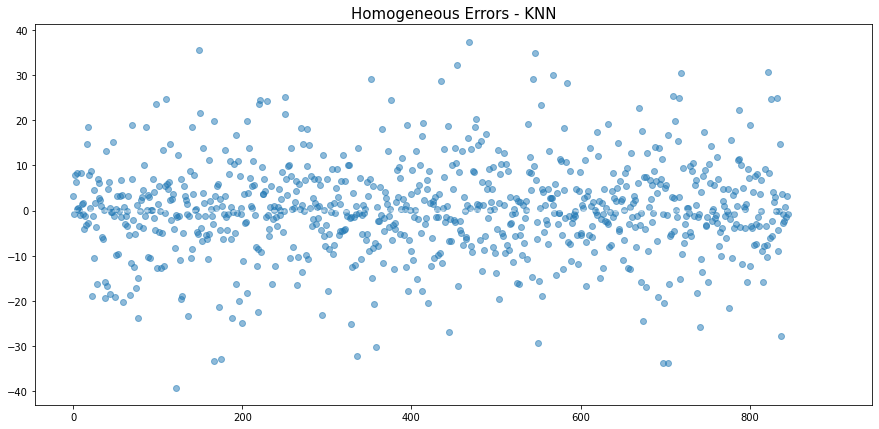

In [6]:
plt.figure(figsize=(15,7))
# Errors
ax_x= performance['True Value']
ax_y= performance['Prediction']
yerr= performance['Error']

plt.scatter(range(len(yerr)), yerr, alpha=.5)
plt.title('Homogeneous Errors - KNN', size=15);
plt.hlines(y=0, xmin=0, xmax=900, linestyle='--', color='white', alpha=.5)

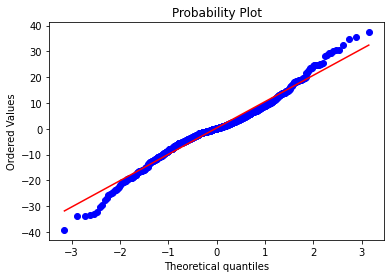

In [7]:
from scipy.stats import probplot

probplot(yerr, dist='norm', plot=plt);

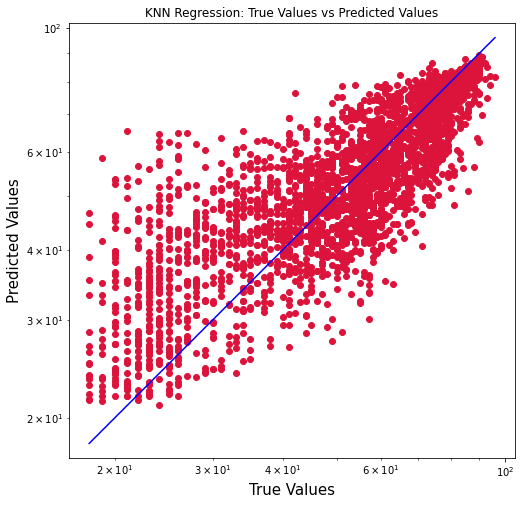

In [9]:
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)
true_val = y_train
pred_val = y_pred_train
plt.figure(figsize=(8,8))
plt.scatter(true_val, pred_val, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(pred_val), max(true_val))
p2 = min(min(pred_val), min(true_val))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.title("KNN Regression: True Values vs Predicted Values")
plt.axis('equal')
plt.show()